In [1]:
pip instal tensorflow


The following command must be run outside of the IPython shell:

    $ pip instal tensorflow

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
dataset=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=dataset.load_data()
plt.imshow(x_train[10],cmap='gray')
y_train[10]

NameError: name 'tf' is not defined

In [ ]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255
y_train=y_train.astype("float32")
y_tets=y_test.astype("float32")
print(x_train.shape)

(60000, 784)


In [ ]:
inputs = keras.Input(shape=(784,))
inputs.shape



TensorShape([None, 784])

In [ ]:
dense = layers.Dense(64, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(dense)
outputs = layers.Dense(10 ,activation="Softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
              optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
                
              
              )

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 6s 3ms/step - loss: 1.6067 - accuracy: 0.8769 - val_loss: 1.5381 - val_accuracy: 0.9300
Epoch 2/10
750/750 [==============================] - 3s 3ms/step - loss: 1.5340 - accuracy: 0.9326 - val_loss: 1.5278 - val_accuracy: 0.9385
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 1.5184 - accuracy: 0.9463 - val_loss: 1.5186 - val_accuracy: 0.9459
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 1.5093 - accuracy: 0.9548 - val_loss: 1.5077 - val_accuracy: 0.9553
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 1.5028 - accuracy: 0.9605 - val_loss: 1.5054 - val_accuracy: 0.9574
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 1.4979 - accuracy: 0.9654 - val_loss: 1.5007 - val_accuracy: 0.9617
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 1.4943 - accuracy: 0.9686 - val_loss: 1.4971 - val_accuracy: 0.9654
Epoch 

In [ ]:
loss,acc=model.evaluate(x_test,y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 [==============================] - 1s 2ms/step - loss: 1.4936 - accuracy: 0.9687

Testing loss: 1.49, acc: 0.97%


**With Convolution**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

3

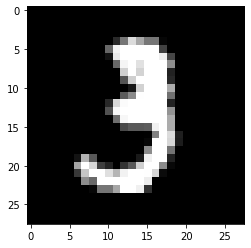

In [ ]:
dataset=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=dataset.load_data()
plt.imshow(x_train[10],cmap='gray')
y_train[10]

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
y_train=tf.keras.utils.to_categorical( y_train, dtype='float32')
y_test=tf.keras.utils.to_categorical(  y_test, dtype='float32')
print(x_train.shape)

(60000, 28, 28)


In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
#--------------------------------------------
conv1=layers.Conv2D(32,kernel_size=4,activation="relu")(inputs)
maxpooling1=layers.MaxPooling2D(2)(conv1)
flat1=layers.Flatten()(maxpooling1)
#---------------------------------------------
conv2=layers.Conv2D(16,kernel_size=4,activation="relu")(inputs)
maxpooling2=layers.MaxPooling2D(2)(conv2)
flat2=layers.Flatten()(maxpooling2)
#---------------------------------------------
merge=tf.keras.layers.Concatenate()([flat1, flat2])

#dense = layers.Dense(64, activation="relu")(merge)
x = layers.Dense(128, activation="relu")(merge)
outputs = layers.Dense(10 ,activation="Softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 32)   544         ['input_16[0][0]']               
                                                                                                  
 conv2d_24 (Conv2D)             (None, 25, 25, 16)   272         ['input_16[0][0]']               
                                                                                                  
 max_pooling2d_23 (MaxPooling2D  (None, 12, 12, 32)  0           ['conv2d_23[0][0]']              
 )                                                                                      

In [ ]:
model.compile(
              loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy']
           
           
              )

In [ ]:

model.fit(
  x_train,y_train,epochs=15,batch_size=64,validation_split=0.2
  )

Epoch 1/15
750/750 [==============================] - 12s 4ms/step - loss: 0.1607 - accuracy: 0.9535 - val_loss: 0.0716 - val_accuracy: 0.9799
Epoch 2/15
750/750 [==============================] - 4s 5ms/step - loss: 0.0530 - accuracy: 0.9836 - val_loss: 0.0537 - val_accuracy: 0.9843
Epoch 3/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0566 - val_accuracy: 0.9844
Epoch 4/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0233 - accuracy: 0.9927 - val_loss: 0.0557 - val_accuracy: 0.9831
Epoch 5/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0516 - val_accuracy: 0.9862
Epoch 6/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0444 - val_accuracy: 0.9883
Epoch 7/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0100 - accuracy: 0.9966 - val_loss: 0.0642 - val_accuracy: 0.9848
Epoch

In [ ]:
loss,acc=model.evaluate(x_test,y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0553 - accuracy: 0.9865

Testing loss: 0.06, acc: 0.99%
